
<img src="./Images/coverslide.png" />

# <center> Introduction
    
- CNNs are deep learning algorithms for analyzing visual data, especially images
    
- CNNs are designed to learn spatial hierarchies of the features from the image pixels automatically through backpropagation

# <center> Introduction
#### Advantages:
- CNNs extracts Features directly from raw image pixels, hence no need to do manual feature engineering
- CNNs retain Spatial Hierarchies, while processing feeded images
- CNNs are more efficient due to Parameter Sharing
- CNNs are Translation Invariance, that means they can recognise patterns or features from image pixels regardles of their position in the image
    
#### Some Disadvantages:
- CNNs are Computational Complex, with large number of parameters and consume good hardware resources
- CNNs require large labelled training data, to make correct predictions. 


# <center> Introduction

#### Common Applications

- Classification of images
- Live object detection 
- Image segmentation
- Facial recognition
- Image Analysis in medical field


<img src="./Images/CNNLayers.png" />

# <center> Therory - Convolution Operation
    
- Features are extracted with convolutional operation
- A convolutional layer has number of filters (each from a neuron) that does convolutional operations
- A filter is a matrix of defined size, comprises of weights, which slide over the input images
- Weights of a filter are learned automatically through training process on the input dataset
- Output of Convolutional Layer is described as Convolutional Volume

<img src="./Images/6convolution.png"/>

# <center>Therory - Activation Functions
    
- After the convolutional operation to introduce non linearity, a non linear activation function is appliesd to extracted features
- Most popular activation functions used for this purpose are
    - Rectified Linear Unit (ReLU) 
    
    <center>$\sigma(z)=\max(0, z)$</center>
        
    - Leaky ReLU
    - Parametric ReLU
    

Code:    
```python
layers.Conv2D(filters=32, kernal_size=(3, 3), activation='relu')
```

# <center> Theroy - Pooling Operation
    

- Pooling is a downsampling operation to reduce the spatial dimentionality of feature maps
- It helps to resude the computational complexity, and helps the program to focus more on dominant features
- Pooling also enforces algorithm on spatial invariance
- A patch of defined size stride over the feature map and generate output of reduced spatial dimentionality  
- Types:
    - Max Pooling: Takes the maximum value
    - Average Pooling: Takes the average value
    - Min Pooling: Takes the minimum value


<img src="./Images/Pooling-operation.png" width="700" />

# <center> Fully Connected/Dense Layers
    
- 2D data generated after Convolutional and Pooling operations, is converted into 1D data. This process is called flattenning 
```python
layers.Flatten()
```
- The flatten data is fead to Dense Layers network
```python
layers.Dense(units=64, activation='relu')
```
- In fully connected layers, every neuron is connected to every neurons of the another (adjacent) layers.

# Implementation of Convolutional Neural Networks (CNN)

### 1. Prepare and Load the data:

* Input shape(eg. width, heighth, the number of channels(RGB))
* Split data into training, validation, and test datasets.

### 2. Define Model Architecture:

* Decide on the number and type of layers [convolutional(feature), pooling(dimensionality reduction), fully connected(output)].
* Specify activation functions [ReLU(non-linearity), sigmoid, etc.].
* Determine other hyperparameters like COV(kernel size, stride, padding), pooling(pool_size,stride),FC(activation) etc.

### 3. Compile the Model:
* Define the optimizer (e.g.Adam) and learning rate(minimize the loss function).

### 4. Train the Model:

* Feed data batches to the model.
* Monitor the training progress with validation data.

### 5. Evaluate the Model:

* Use test data to assess model accuracy and other metrics.

# Advantages and Disadvantages of CNN

## Advantages
1.Parameter Sharing:
* Convolutional layers reuse weights across different spatial locations.

2.Local Receptive Fields:
* Each neuron only processes a local region of the input, allowing efficient spatial feature extraction.

3.Translation Invariance:
* Pooling layers provide robustness to small spatial translations in the input.

4.Deep Representations:
* Hierarchical feature extraction enables recognition of complex patterns.

5.Scalability:
* Capable of handling high-dimensional data like images, video, and audio.

## Disadvantages
1.Large Data Requirements:
* CNNs need large datasets for effective training, often requiring data augmentation.

2.Computational Cost:
* High memory and computational requirements, particularly with deep architectures.

3.Lack of Spatial Understanding:
* Cannot inherently learn spatial relationships without specific architectural modifications.

4.Overfitting:
* Prone to overfitting if data augmentation or regularization is not used.

<div align="center">
    
# Example for CNN Model

</div>

## MNIST Data (Modified National Institute of Standards and Technology database):

It is a large database of handwritten digits, commonly used for training various image processing systems. It has 60,000 training images and 10,000 testing images.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Loading the dataset
(x_train, y_train), (x_test, y_test)  = datasets.mnist.load_data()

# Reshaping our MNIST dataset
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

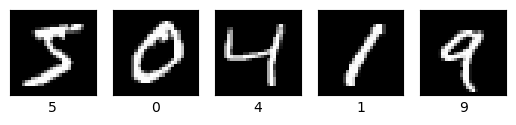

In [3]:
# printing the first 5 images
for i in range(5):
    plt.subplot( 1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# Normalizing the pixel values(0-255) to binary(0 AND 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# below code is to print the shape of the data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [6]:
# Building a NEW model

CNN_model = Sequential()
CNN_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(Flatten())
CNN_model.add(Dropout(0.5))  
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(10, activation='softmax'))

2024-05-08 22:44:02.440674: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-08 22:44:02.440693: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-08 22:44:02.440698: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-08 22:44:02.440921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-08 22:44:02.440940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# Compiling the created model with adam optimizer
CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# summary of the model
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [9]:
# Training the model with validation slpit 10%
CNN_history = CNN_model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15


2024-05-08 22:44:03.129326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 14s 8ms/step - loss: 0.1668 - accuracy: 0.9476 - val_loss: 0.0385 - val_accuracy: 0.9895
Epoch 2/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0465 - val_accuracy: 0.9873
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 4/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 5/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0407 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9913
Epoch 6/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.0437 - val_accuracy: 0.9900
Epoch 7/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0438 - accuracy: 0.9894 - val_loss: 0.0530 - val_accuracy: 0.9

In [10]:
#  Finally we are evaluating the model and printing the accuracy and loss
test_loss, test_acc = CNN_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.2494845986366272
Test Accuracy: 0.9919999837875366


In [11]:
# after evaluating the model,we are going to predicting the values from the test dataset
y_predict = CNN_model.predict(x_test)
y_predict_classes = np.argmax(y_predict, axis=1)

313/313 [==============================] - 1s 3ms/step


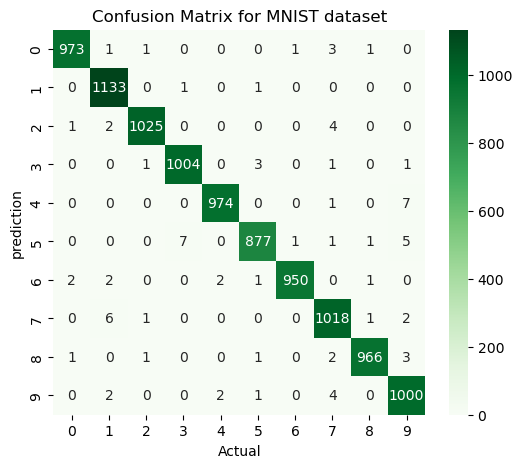

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# checking the prediction with confusion matrix
confusion_mat = confusion_matrix(y_test, y_predict_classes)

# Plotting confusion matrix with heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Confusion Matrix for MNIST dataset')
plt.show()

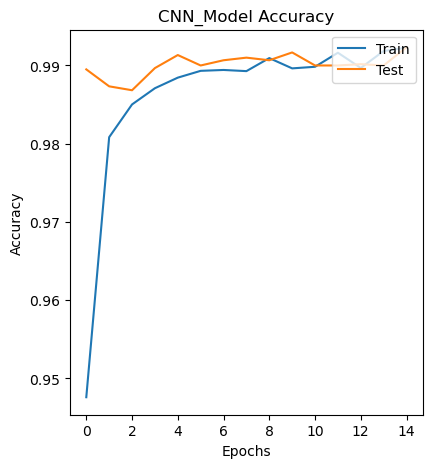

In [13]:
# Plotting the training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN_Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

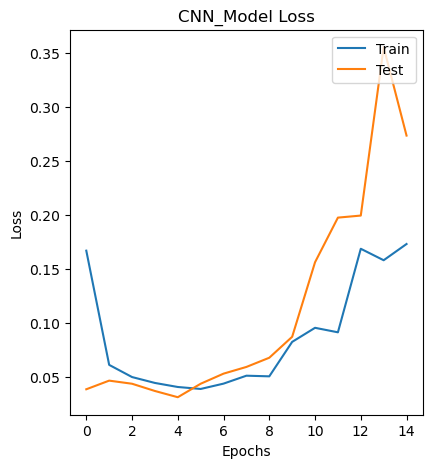

In [14]:
# Plotting the training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN_Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Tips and Tricks


## Best Practices:

1.**Batch normalization:** It can speed up training and has slight regularization effect.

2.**Data agumentation:** By using Data augmentation the dataset will expand artificially by applying tranformations like rotation, flipping etc. this helps to generalize the model better by learning from more varied set of data.

## Common Pitfalls to Avoid:

1 dropout layers and data augmentation helps to avoid overfitting, and underfitting by increasing complexity of model.

2.normalizing the data, tuning the hyperparameters and use a validation set to ensure the generalizability and performance of the model.

## Optimization Techniques:

1.Adaptive learning rate methods like Adam for faster convergence. 

2.Hyperparameter tuning via grid or random search to optimizing the performance of model.

3.Implement the early stopping methods to prevent overfitting.

# <center> Conclusion

- The convolutional layers are responsible for learning local features of the input
- The pooling layers take these features and downsample them, reducing the computational complexity for the network and adding a level of translational invariance
- the fully connected layers take the condensed, high-level features and use them to make a final prediction
    


 

## Advantages of CNN over other similar algorithms
### Fully Connected Neural Networks (FCNN):
#### Pros:
- Efficient at automatic feature extraction
- Preserves spatial heirarchical information
- Has the capacity of handling spatial invariance
- Memory efficient compared to FCNN
#### Cons:
- More complex in implimenting compared to FCNN
- Not as effects as FCNN in handling sequential data such as timeseries

###  Recurrent Neural Networks (RNNs):
#### Pros:
- CNNs are effective with spatial data like images
- CNNs are better handling spatial invariance and preserving heirarchical information
- - Memory efficient compared to RNN
#### Cons:
- RNNs are more effective for sequential data like text and speech



# <center> References
    
- Deep Learning lecture slides by Dr. Conor D. Rankine, University of York
- CNN Lecture slides by Prof. Manolis Kellis, MIT https://mit6874.github.io/assets/sp2020/slides/L03_CNNs_MK2.pdf

- Deep Learning(CNN) https://training.galaxyproject.org/training-material/topics/statistics/tutorials/CNN/tutorial.html
- Understanding CNN filters (Medium): https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32#:~:text=In%20our%20case%2C%20the%20input,size%203x3%2C%20called%20feature%20maps.
- Pooling operation image: https://www.researchgate.net/figure/Pooling-operation_fig2_373479024
- CNN Lessons (Medium): https://medium.com/@nerdjock
- MIT 6.S191 (2023): Convolutional Neural Networks - https://www.youtube.com/watch?v=NmLK_WQBxB4
- An Introduction to Convolutional Neural Networks - https://arxiv.org/abs/1511.08458
- Recent advances in convolutional neural networks - https://www.sciencedirect.com/science/article/pii/S0031320317304120?casa_token=Ma0YG4UAKPYAAAAA:gkm9yAj2DigREz8ryuSxaIowlNZxwGvlareGrUwlE2MssKiPRzQxt4DlHT8OmXG7ay-VS-8KXw    
- MNIST dataset: http://yann.lecun.com/exdb/mnist/   